## The Notebooks explores the basic use of Pandas and scikit-learn for Titanic: Machine Learning from Disaster using 14 ML Algorithms

Ahmed M.Kahlifa


<a id="3"></a> <br>
##  Import Libraries

In [1]:
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id="5"></a> <br>
## Load Data

In [2]:
traindata =  pd.read_csv('C:/Users/3arrows/Desktop/ML Projects/Learn Machine Learning ON Board Titanic - 17 Algorithms/titanic/train.csv')

In [3]:
testdata =  pd.read_csv('C:/Users/3arrows/Desktop/ML Projects/Learn Machine Learning ON Board Titanic - 17 Algorithms/titanic/test.csv')

## Exploratory Data Analysis

In [4]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(traindata.shape)
print(testdata.shape)

(891, 12)
(418, 11)


In [7]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="29"></a> <br>
##  Data Cleaning 

The process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. Data cleansing may be performed interactively with data wrangling tools, or as batch processing through scripting. 

Fis

In [10]:
traindatacopy = traindata.copy()
testdatacopy = testdata.copy()

In [11]:
print('Train columns with null values: {} \n' .format(traindatacopy.isnull().sum()))

print('Test columns with null values: {}'.format(testdatacopy.isnull().sum()))

Train columns with null values: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Test columns with null values: PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
traindatacopy['Age'].fillna(traindatacopy['Age'].median(), inplace = True)

testdatacopy['Age'].fillna(testdatacopy['Age'].median(), inplace = True)

drop_column = ['Cabin']
#drop_column = ['PassengerId', 'Ticket']
traindatacopy.drop(drop_column, axis=1, inplace = True)
testdatacopy.drop(drop_column, axis=1, inplace = True)

In [21]:
print('Train columns with null values: {} \n' .format(traindatacopy.isnull().sum()))

print('Test columns with null values: {}'.format(testdatacopy.isnull().sum()))

Train columns with null values: Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
FamilySize    0
IsAlone       0
dtype: int64 

Test columns with null values: Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      0
FamilySize    0
IsAlone       0
dtype: int64


In [22]:
traindatacopy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [23]:
testdatacopy.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0


In [24]:
alltables = [traindatacopy, testdatacopy]

for dataset in alltables:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1


C:\Users\3arrows\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
traindatacopy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [26]:
testdatacopy.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0


<a id="6"></a> <br>
## Visualization


 How many people survived from all passengers in traindatacopy?

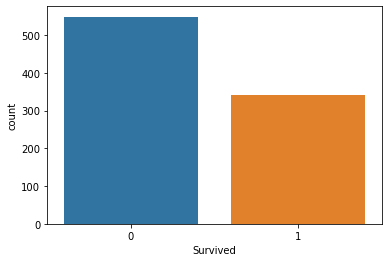

In [27]:
sns.countplot(x="Survived", data=traindatacopy) 

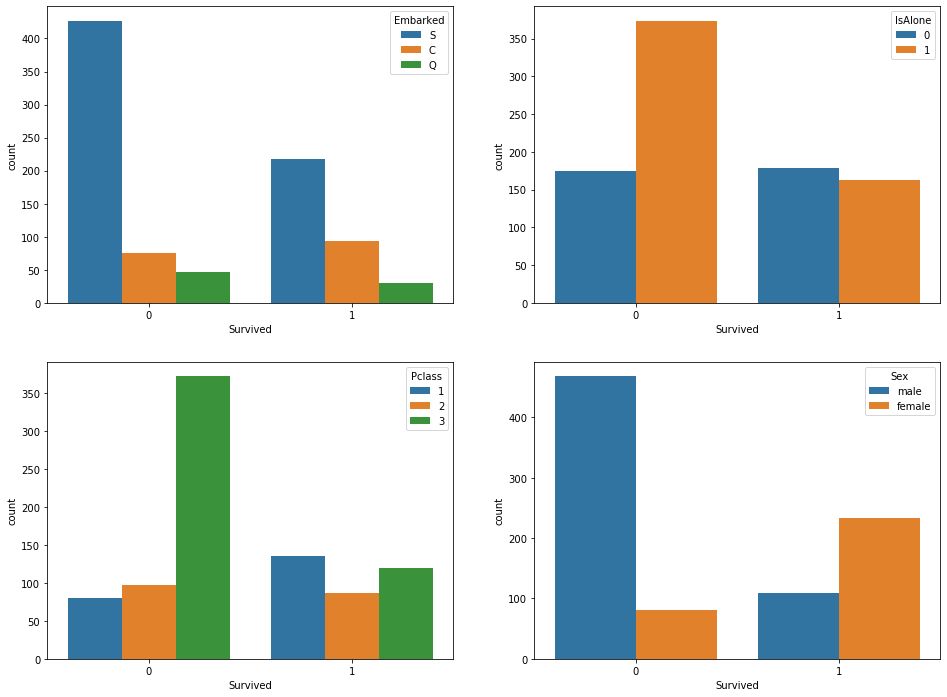

In [28]:
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.countplot(x='Survived', hue="Embarked", data=traindatacopy,ax = saxis[0,0])   
sns.countplot(x='Survived', hue="IsAlone", data=traindatacopy,ax = saxis[0,1])
sns.countplot(x="Survived", hue="Pclass", data=traindatacopy, ax = saxis[1,0])
sns.countplot(x="Survived", hue="Sex", data=traindatacopy, ax = saxis[1,1])


Text(0.5, 1.0, 'Survived (female)')

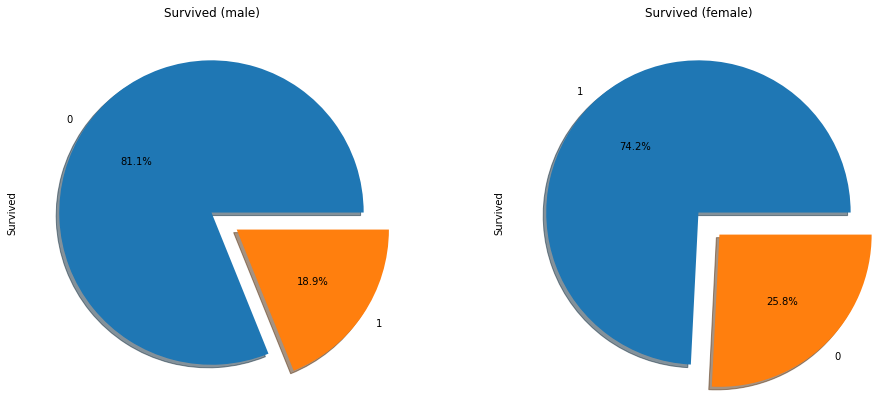

In [29]:
f,ax=plt.subplots(1,2,figsize=(16,7))
traindatacopy['Survived'][traindatacopy['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
traindatacopy['Survived'][traindatacopy['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

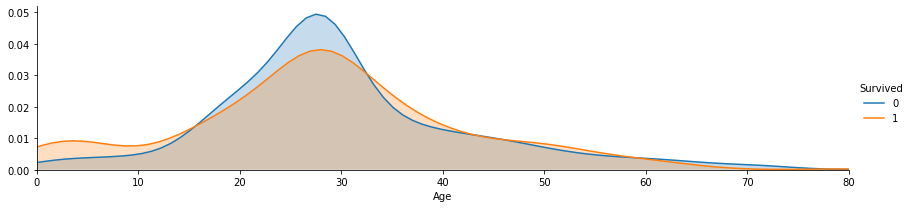

In [30]:
a = sns.FacetGrid(traindatacopy, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , traindatacopy['Age'].max()))
a.add_legend()

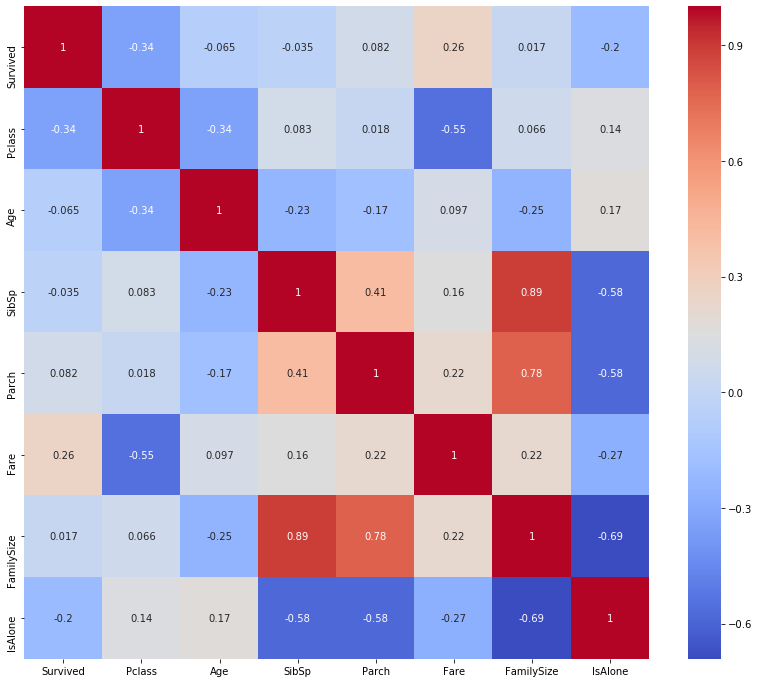

In [35]:
plt.subplots(figsize =(14, 12))
correlation = traindatacopy.corr()
sns.heatmap(correlation, annot=True,cmap='coolwarm')

In [107]:

#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
datatrain_x = ['Sex','Pclass', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
datatrain_x_calc = ['Sex_Code','Pclass', 'SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
datatrain_xy =  Target + datatrain_x
print('Original X Y: ', datatrain_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
datatrain_x_bin = ['Pclass',  'FamilySize' ]
datatrain_xy_bin = Target + datatrain_x_bin
print('Bin X Y: ', datatrain_xy_bin, '\n')


#define x and y variables for dummy features original
datatrain_dummy = pd.get_dummies(traindatacopy[datatrain_x])
datatrain_x_dummy = datatrain_dummy.columns.tolist()
datatrain_xy_dummy = Target + datatrain_x_dummy
print('Dummy X Y: ', datatrain_xy_dummy, '\n')

datatrain_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Pclass', 'FamilySize'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1


<a id="7"></a> <br>
## Prepare Train and Test

scikit-learn provides a helpful function for partitioning data, train_test_split, which splits out your data into a training set and a test set.

- Training set for fitting the model
- Test set for evaluation only

In [66]:
#split train and test data with function defaults
from sklearn.model_selection import train_test_split
from sklearn import model_selection

train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = train_test_split(traindatacopy[datatrain_x_calc], traindatacopy[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(traindatacopy[datatrain_x_bin], traindatacopy[Target] , random_state = 0)

print("DataTrain Shape: {}".format(traindatacopy.shape))
print("Train1 Shape: {}".format(train1_x_dummy.shape))
print("Test1 Shape: {}".format(test1_x_dummy.shape))


DataTrain Shape: (891, 12)
Train1 Shape: (668, 6)
Test1 Shape: (223, 6)


In [67]:
train1_x_dummy.head()

,Sex_Code,Pclass,SibSp,Parch,Age,Fare
105,1,3,0,0,28.0,7.8958
68,0,3,4,2,17.0,7.9250
253,1,3,1,0,30.0,16.1000
320,1,3,0,0,22.0,7.2500
706,0,2,0,0,45.0,13.5000


<a id="8"></a> <br>
# Machine Learning Algorithms
<img src="https://i.vas3k.ru/7vx.jpg">
Image credit:vas3k.com 



<a id="13"></a> <br>
#### 1. K-Nearest Neighbors

It can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its K nearest neighbors measured by a distance function.

In [70]:
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=5).fit(train1_x_dummy, train1_y_dummy)

y_predKN = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(y_predKN,test1_y_dummy))

KNN = accuracy_score(y_predKN,test1_y_dummy)

accuracy is 0.7488789237668162


C:\Users\3arrows\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [72]:
from sklearn.preprocessing import MinMaxScaler

scalar =  MinMaxScaler()

x_scaled = scalar.fit_transform(train1_x_dummy)
y_scaled = scalar.fit_transform(train1_y_dummy)

Model1 = KNeighborsClassifier(n_neighbors=5).fit(x_scaled, train1_y_dummy)

predKN = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(predKN,test1_y_dummy))



accuracy is 0.7488789237668162


C:\Users\3arrows\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


<a id="18"></a> <br>
#### 2. Radius Neighbors Classifier

In scikit-learn RadiusNeighborsClassifier is very similar to KNeighborsClassifier with the exception of two parameters. First, in RadiusNeighborsClassifier we need to specify the radius of the fixed area used to determine if an observation is a neighbor using radius. Unless there is some substantive reason for setting radius to some value, it is best to treat it like any other hyperparameter and tune it during model selection. The second useful parameter is outlier_label, which indicates what label to give an observation that has no observations within the radius - which itself can often be a useful tool for identifying outliers.

In [94]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=148).fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

print('accuracy is ', accuracy_score(test1_y_dummy,y_pred))

RNC = accuracy_score(test1_y_dummy,y_pred)

C:\Users\3arrows\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accuracy is  0.6457399103139013


<a id="14"></a> <br>
#### 3. Naive Bayes

It is a classification technique based on Bayes’ theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple.

In [74]:
from sklearn.naive_bayes import GaussianNB

Model = GaussianNB().fit(train1_x_dummy, train1_y_dummy)

y_predN = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(y_predN,test1_y_dummy))

NBB = accuracy_score(y_predN,test1_y_dummy)

accuracy is 0.7802690582959642


C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<a id="20"></a> <br>
#### 4. BernoulliNB

Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.

In [75]:
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB().fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

Ber = accuracy_score(y_pred,test1_y_dummy)

C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy is 0.7802690582959642


<a id="15"></a> <br>
#### 5. Support Vector Machines

It is a classification method. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

For example, if we only had two features like Height and Hair length of an individual, we’d first plot these two variables in two dimensional space where each point has two co-ordinates (these co-ordinates are known as Support Vectors)

In [76]:
from sklearn.svm import SVC

Model = SVC().fit(train1_x_dummy, train1_y_dummy)

y_predSVM = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(y_predSVM,test1_y_dummy))

SVMm = accuracy_score(y_predSVM,test1_y_dummy)

C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy is 0.7399103139013453


In [90]:
from sklearn.svm import SVC

Model = SVC(kernel='rbf' , gamma=1).fit(train1_x_dummy, train1_y_dummy)

y_predSVM = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(y_predSVM,test1_y_dummy))

SVMrbf = accuracy_score(y_predSVM,test1_y_dummy)

accuracy is 0.6771300448430493


C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<a id="17"></a> <br>
#### 6. Linear Support Vector Classification [LSVM]

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

In [89]:
from sklearn.svm import LinearSVC

Model = LinearSVC().fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

LSVM = accuracy_score(y_pred,test1_y_dummy)

accuracy is 0.6636771300448431


C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<a id="16"></a> <br>
#### 7. Nu-Support Vector Classification

Similar to SVC but uses a parameter to control the number of support vectors.

The implementation is based on libsvm.

In [91]:
from sklearn.svm import NuSVC

ModelNU = NuSVC().fit(train1_x_dummy, train1_y_dummy)

y_predNu = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(y_predNu,test1_y_dummy))

NuS = accuracy_score(y_predNu,test1_y_dummy)

accuracy is 0.6771300448430493


C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<a id="10"></a> <br>
#### 8. Decision Tree

It is a type of supervised learning algorithm that is mostly used for classification problems. Surprisingly, it works for both categorical and continuous dependent variables. In this algorithm, we split the population into two or more homogeneous sets. This is done based on most significant attributes/ independent variables to make as distinct groups as possible. 


In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


Model = DecisionTreeClassifier().fit(train1_x_dummy, train1_y_dummy)

y_predL = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(y_predL,test1_y_dummy))

DT = accuracy_score(y_predL,test1_y_dummy)

accuracy is 0.757847533632287


<a id="12"></a> <br>
#### 9. Logistic Regression

Don’t get confused by its name! It is a classification not a regression algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

In [93]:

from sklearn.linear_model import LogisticRegression

Model = LogisticRegression().fit(train1_x_dummy, train1_y_dummy)

y_predLR = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(y_predLR,test1_y_dummy))

LR = accuracy_score(y_predLR,test1_y_dummy)

C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy is 0.7847533632286996


<a id="11"></a> <br>
#### 10. RandomForest

Random Forest is a trademark term for an ensemble of decision trees. In Random Forest, we’ve collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

In [97]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2).fit(train1_x_dummy, train1_y_dummy)
y_predR=Model.predict(test1_x_dummy)

print('accuracy is ',accuracy_score(y_predR,test1_y_dummy))

RT = accuracy_score(y_predR,test1_y_dummy)


accuracy is  0.8116591928251121


C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\3arrows\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


<a id="21"></a> <br>
#### 11.  ExtraTreeClassifier

ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting.
Let’s look at some ensemble methods ordered from high to low variance, ending in ExtraTreesClassifier.

In [98]:
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier().fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

ETC = accuracy_score(y_pred,test1_y_dummy)

accuracy is 0.757847533632287


<a id="22"></a> <br>
#### 12. Bagging classifier 

Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [99]:
from sklearn.ensemble import BaggingClassifier

Model=BaggingClassifier().fit(train1_x_dummy, train1_y_dummy)

y_pred=Model.predict(test1_x_dummy)

print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

BCC = accuracy_score(y_pred,test1_y_dummy)

C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy is  0.8161434977578476


<a id="23"></a> <br>
####  13. AdaBoost classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [100]:
from sklearn.ensemble import AdaBoostClassifier

Model=AdaBoostClassifier().fit(train1_x_dummy, train1_y_dummy)

y_pred=Model.predict(test1_x_dummy)

print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

AdaB = accuracy_score(y_pred,test1_y_dummy)

C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy is  0.8026905829596412


<a id="24"></a> <br>
#### 14. Gradient Boosting Classifier

GBM is a boosting algorithm used when we deal with plenty of data to make a prediction with high prediction power. Boosting is actually an ensemble of learning algorithms which combines the prediction of several base estimators in order to improve robustness over a single estimator. It combines multiple weak or average predictors to a build strong predictor.

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

Model=GradientBoostingClassifier().fit(train1_x_dummy, train1_y_dummy)

y_predGR=Model.predict(test1_x_dummy)


print('accuracy is ',accuracy_score(y_predGR,test1_y_dummy))

GBCC = accuracy_score(y_predGR,test1_y_dummy)

C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy is  0.8295964125560538


<a id="30"></a> <br>
###  Scores

In [102]:
models = pd.DataFrame({
    'Model': ['K-Nearest Neighbours','Radius Neighbors Classifier', 'Naive Bayes', 'BernoulliNB', 'Support Vector Machines',
              'Linear Support Vector Classification', 'Nu-Support Vector Classification', 'Decision Tree', 'LogisticRegression',
              'Random Forest', 'ExtraTreeClassifier', "Bagging classifier ", "AdaBoost classifier", 'Gradient Boosting Classifier'],
    'Score': [ KNN, RNC, NBB, Ber, SVMm, LSVM , NuS, DT, LR, RT,ETC, BCC, AdaB,  GBCC]})
models.sort_values(by='Score', ascending=False)

,Model,Score
13,Gradient Boosting Classifier,0.829596
11,Bagging classifier,0.816143
9,Random Forest,0.811659
12,AdaBoost classifier,0.802691
8,LogisticRegression,0.784753
2,Naive Bayes,0.780269
3,BernoulliNB,0.780269
7,Decision Tree,0.757848
10,ExtraTreeClassifier,0.757848
0,K-Nearest Neighbours,0.748879


Text(0, 0.5, 'Algorithm')

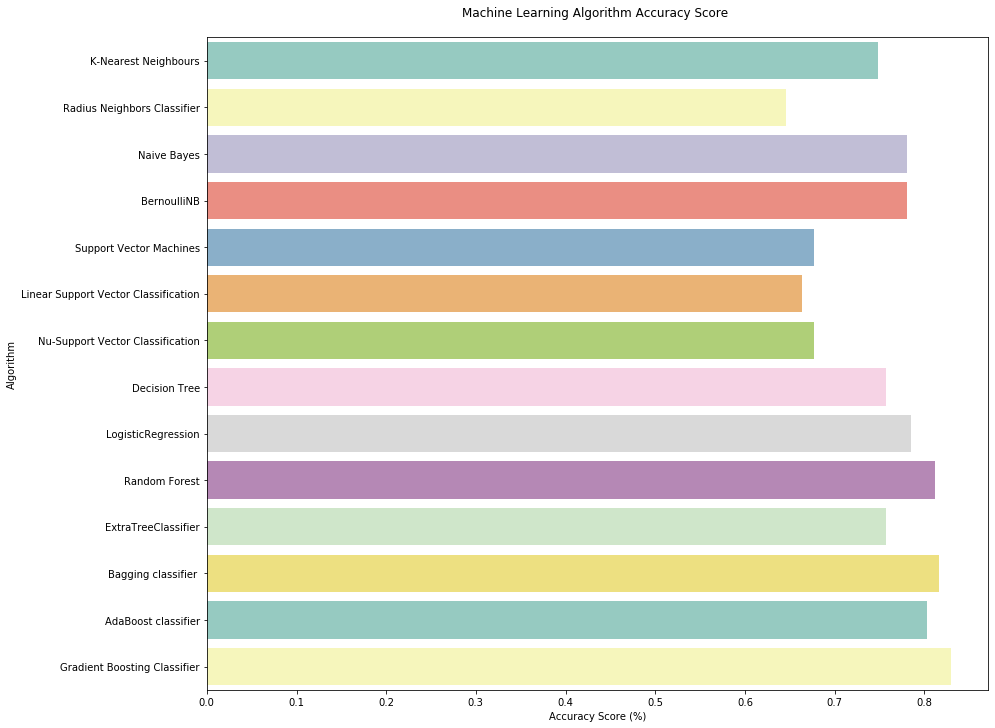

In [103]:
plt.subplots(figsize =(14, 12))

sns.barplot(x='Score', y = 'Model', data = models, palette="Set3")

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [119]:
submit_gbc = GradientBoostingClassifier()

submit_gbc.fit(traindatacopy[datatrain_x_bin], traindatacopy[Target])

rr = submit_gbc.predict(testdatacopy[datatrain_x_bin])

C:\Users\3arrows\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
rr

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

## Submit

In [121]:
submission = pd.DataFrame({
        "PassengerId": testdata["PassengerId"],
        "Survived": rr
    })
submission.to_csv('titanic_submission.csv', index=False)

submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,1
8,900,0
9,901,0


<a id="28"></a> <br>
## References

https://www.kaggle.com/marcovasquez/machine-learning-on-board-titanic-17-algothim


